In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
from sklearn.cluster import KMeans
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, \
        dimension_reduction, \
        calc_contribution, \
        calc_contribution_rank, \
        remove_anomaly

import src.crs as crs
from IPython.display import clear_output

# Load Data

In [3]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

copy_df = df.copy()

In [4]:
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

setting start
setting end


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [5]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

setting start
setting end
10 / 248 ==> 86.77059843740079
20 / 248 ==> 82.30176939923716
30 / 248 ==> 82.24367773554765
40 / 248 ==> 81.58104478537285
50 / 248 ==> 84.22278871608768
60 / 248 ==> 80.93316531416347
70 / 248 ==> 80.92063592601029
80 / 248 ==> 80.99648808923693
90 / 248 ==> 87.87073010344298
100 / 248 ==> 81.4120189627831
110 / 248 ==> 81.7912077391251
120 / 248 ==> 77.22850069647606
130 / 248 ==> 85.90119494888187
140 / 248 ==> 82.75546861874625
150 / 248 ==> 84.29813518595206
160 / 248 ==> 89.48493983561283
170 / 248 ==> 87.12813206890434
180 / 248 ==> 80.04718305486038
190 / 248 ==> 82.36421442645177
200 / 248 ==> 84.12507984441775
210 / 248 ==> 84.06000233185645
220 / 248 ==> 83.1384048636994
230 / 248 ==> 84.0366893426478
240 / 248 ==> 80.05377833872068
248 / 248 ==> 81.93918890341807


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,2.0,5.0,0.0,1.0,1.0,5.0,5.0,4.0,4.0,5.0,...,2.0,4.0,2.0,2.0,6.0,2.0,5.0,5.0,4.0,2.0
1,1.0,2.0,0.0,6.0,6.0,2.0,2.0,1.0,2.0,2.0,...,0.0,0.0,5.0,2.0,5.0,1.0,0.0,0.0,0.0,3.0
2,6.0,6.0,6.0,6.0,6.0,4.0,0.0,4.0,4.0,4.0,...,6.0,2.0,1.0,0.0,5.0,0.0,0.0,4.0,1.0,0.0
3,6.0,6.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0,6.0,...,6.0,2.0,5.0,3.0,3.0,3.0,6.0,5.0,5.0,3.0
4,6.0,3.0,3.0,3.0,3.0,6.0,2.0,6.0,5.0,6.0,...,2.0,4.0,4.0,5.0,0.0,2.0,3.0,6.0,6.0,5.0


# Contribution Map

In [212]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

cont_mean_df = remove_anomaly(df, contribution_df)

print("{} ~ {} 까지의 기여도 그룹이 만들어졌다.".format(
    cont_mean_df['contribution'].min(), cont_mean_df['contribution'].max()))
cont_count = pd.DataFrame(
    cont_mean_df['contribution'].groupby(cont_mean_df['contribution']).count()
)
cont_count.columns = ['그룹 멤버 수']
cont_count

아파트1-101-402 9.0 -> 7.0 변함
아파트1-102-301 10.0 -> 8.0 변함
아파트1-103-106 27.0 -> 25.0 변함
아파트1-102-404 3.0 -> 1.0 변함
아파트1-102-802 52.0 -> 24.0 변함
아파트1-101-1302 47.0 -> 19.0 변함
1.0 ~ 6.0 까지의 기여도 그룹이 만들어졌다.


,그룹 멤버 수
contribution,
1.0,7
2.0,15
3.0,34
4.0,25
5.0,20
6.0,7


In [213]:
cont_mean_df.loc['아파트1-103-106']

contribution    5.0
Name: 아파트1-103-106, dtype: float64

# 대표 클러스터링 패턴 선정
- 각 기여도 그룹의 가구들은 n시간 마다 특정 군집에 속해있었다.
- 특정 기여도 그룹의 n개의 시간대의 대표 클러스터링 패턴 선정은 해당 그룹의 멤버들이 가장 많이 속해 있었던 클러스터링으로 선정을 하겠다.

In [214]:
# Cluster by Contribution GroupBy
cc = pd.DataFrame()
cont_group = set(cont_mean_df.values.flatten())

for group in cont_group:
    group_cols = cont_mean_df[cont_mean_df['contribution'] == group].index
    _hc = hc[group_cols].T.copy()
    _clusters = np.array([])
    
    for idx in range(0, len(hc)):
        _group = _hc[idx].groupby(_hc[idx]).count()
        max_cluster = _group.argmax()

        _clusters = np.append(_clusters,
                              _group.keys()[max_cluster])
    
    cc["기여도 그룹 {}".format(int(group))] = _clusters
    
cc_cont = calc_contribution_rank(cc, ci)
cc_cont.index = contribution_df.index

cc.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
0,1.0,5.0,5.0,2.0,2.0,3.0
1,6.0,2.0,2.0,1.0,1.0,4.0
2,6.0,6.0,4.0,0.0,5.0,5.0
3,1.0,6.0,6.0,5.0,3.0,3.0
4,3.0,6.0,6.0,2.0,6.0,0.0


## 선정된 대표 클러스터링의 패턴 파싱하기

In [215]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T
cc_pattern.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
2018-05-01 00:00:00,0.067,0.162,0.162,0.369,0.369,0.675
2018-05-01 01:00:00,0.063,0.153,0.153,0.329,0.329,0.571
2018-05-01 02:00:00,0.056,0.162,0.162,0.320,0.320,0.476
2018-05-01 03:00:00,0.062,0.164,0.164,0.258,0.258,0.511
2018-05-01 04:00:00,0.051,0.161,0.161,0.269,0.269,0.511


## 전체 클러스터 평균

In [216]:
_all_cluster = np.array([])
_hc_t = hc.T.copy()

for div_round, _hc_t_col in enumerate(_hc_t):
    count_group = _hc_t[_hc_t_col].groupby(_hc_t[_hc_t_col]).count()
    max_idx = count_group.argmax()
    _all_cluster = np.append(_all_cluster, max_idx)
    
all_cluster = pd.DataFrame(_all_cluster, 
                           index=cc_pattern.index[::3],
                          columns=["전체 클러스터 기여도 평균"])

acc = all_cluster.copy()

all_cluster_cont = calc_contribution_rank(acc, ci)
all_cluster_cont.index = cc_pattern.index[::3]

all_cluster_cont.head()

,전체 클러스터 기여도 평균
2018-05-01 00:00:00,3.0
2018-05-01 03:00:00,2.0
2018-05-01 06:00:00,2.0
2018-05-01 09:00:00,3.0
2018-05-01 12:00:00,2.0


In [217]:
all_cluster_pattern = np.array([ci[div_round][0][int(cluster_num[0])].tolist() for 
                       div_round, cluster_num in enumerate(all_cluster.values)])

acc_pattern = pd.DataFrame(all_cluster_pattern.flatten(), 
                          index=cc_pattern.index,
                          columns=acc.columns)
acc_pattern.head()

,전체 클러스터 기여도 평균
2018-05-01 00:00:00,0.248
2018-05-01 01:00:00,0.237
2018-05-01 02:00:00,0.216
2018-05-01 03:00:00,0.164
2018-05-01 04:00:00,0.161


# Consoling

In [218]:
def consoling():
    print("----기여도 그룹을 선택해주세요.")
    for cc_idx, cc_col in enumerate(cc_cols):
        print("{}.{}".format(cc_idx + 1, cc_col))
    print()

    sel_group = int(input())
    sel_cont = cont_mean_df[cont_mean_df['contribution'] == sel_group]
    clear_output()

    print("----피드백 가구 선택")
    print(" • 해당 그룹의 가구 수는 {}가구 입니다.\n".format(len(sel_cont)))
    print("----가구를 선택해주세요.")
    for hh_idx, hh_col in enumerate(sel_cont.index):
        print("{}.{}({}kWh)".format(hh_idx + 1, hh_col, df[hh_col].sum().round().astype("int")))
    sel_hh = int(input())
    sel_hh_col = sel_cont.index[sel_hh - 1]
    clear_output()

    print("----선택 정보를 확인해주세요.")
    print("그룹 명 : {}".format(cc_cols[sel_group - 1]))
    print("가구 명 : {}\n".format(sel_hh_col))

    target_group = sel_group - 1
    if target_group <= 0:
        print("[X] 전기 절약을 잘 실천하고 있는 가구 입니다.")
    else:
        print("----원하시는 피드백 정보를 선택해주세요.")

        sel_cont = contribution_df[sel_hh_col]
        sel_cont_col = cc_cols[target_group - 1]
        target_cont = cc_cont[sel_cont_col]

        clear_output()
        print("----선택 정보를 확인해주세요.")
        print("그룹 명 : {}".format(cc_cols[sel_group - 1]))
        print("가구 명 : {}\n".format(sel_hh_col))

        return cc_cols[sel_group - 1], sel_hh_col

In [473]:
sg, sh = consoling()

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-202



# 전체 기여도와 비교
- 기여도의 의미적인 관점은 "특정 요일에 대하여 높다" 라는 의미에서 "해당 요일에 적게 쓰는 가구들이 많은 날에 많이 사용했다라는 것을 의미한다"

In [474]:
DAY_ARR = np.array(["월", "화", "수", "목", "금", "토", "일"])
TIME_KOR_STR = np.array(["{}시 ~ {}시".format(_, _+(size-1)) for _ in range(0, 24, size)])

all_day_cols = [df.index.weekday == day for day in range(0, 7)]
day_cols = [acc.index.weekday == day for day in range(0, 7)]
time_cols = [acc.index.time == dt.time(time, 0) for time in range(0, 24, size)]
all_time_cols = [(df.index.time >= dt.time(time, 0)) &
                 (df.index.time <= dt.time(time + (size - 1), 0))
                 for time in range(0, 24, size)]

# Cont Parsing
acc_day_cont = pd.DataFrame(
    [acc[day].mean().round() for day in day_cols],
    index=DAY_ARR)
acc_time_cont = pd.DataFrame(
    [acc[time].mean().round() for time in time_cols],
    index=TIME_KOR_STR)

cc_day_cont = pd.DataFrame(
    [cc_cont[day].mean().round() for day in day_cols],
    index=DAY_ARR,
    columns=cc_cont.columns)
cc_time_cont = pd.DataFrame(
    [cc_cont[time].mean().round() for time in time_cols],
    index=TIME_KOR_STR,
    columns=cc_cont.columns)

day_cont = pd.DataFrame(
    [contribution_df[day].mean().round() for day in day_cols],
    index=DAY_ARR,
    columns=contribution_df.columns)
time_cont = pd.DataFrame(
    [contribution_df[time].mean().round() for time in time_cols],
    index=TIME_KOR_STR,
    columns=contribution_df.columns)

# Usage Parsing
acc_day_usage = pd.DataFrame(
    [round(acc_pattern[day].mean() * 1000) / 1000 for day in all_day_cols],
    index=DAY_ARR)
acc_time_usage = pd.DataFrame(
    [round(acc_pattern[time].mean() * 1000) / 1000 for time in all_time_cols],
    index=TIME_KOR_STR)

cc_day_usage = pd.DataFrame(
    [round(cc_pattern[day].mean() * 1000) / 1000 for day in all_day_cols],
    index=DAY_ARR,
    columns=cc_cont.columns)
cc_time_usage = pd.DataFrame(
    [round(cc_pattern[time].mean() * 1000) / 1000 for time in all_time_cols],
    index=TIME_KOR_STR,
    columns=cc_cont.columns)

day_usage = pd.DataFrame(
    [round(df[day].mean() * 1000) / 1000 for day in all_day_cols],
    index=DAY_ARR,
    columns=contribution_df.columns)
time_usage = pd.DataFrame(
    [round(df[time].mean() * 1000) / 1000 for time in all_time_cols],
    index=TIME_KOR_STR,
    columns=contribution_df.columns)

# statistics_cont_count
scc = pd.DataFrame()
max_cont = int(contribution_df.values.max())

all_cont_count = np.array([])
for cont_idx in contribution_df.index:
    _cont_count = contribution_df.loc[cont_idx].groupby(contribution_df.loc[cont_idx]).count()
    cont_count = np.array([])
    for _key in range(1, max_cont + 1):
        if _key in _cont_count.keys():
            cont_count = np.append(cont_count, _cont_count[_key])
        else:
            cont_count = np.append(cont_count, 0)
    
    all_cont_count = np.append(all_cont_count, cont_count)
all_cont_count = all_cont_count.reshape(-1, max_cont)

scc = pd.DataFrame(all_cont_count, index=contribution_df.index, columns=range(1, max_cont+1))

scc.head()

,1,2,3,4,5,6,7
2018-05-01 00:00:00,8.0,24.0,26.0,2.0,0.0,34.0,14.0
2018-05-01 03:00:00,8.0,26.0,19.0,25.0,15.0,8.0,7.0
2018-05-01 06:00:00,20.0,34.0,26.0,4.0,12.0,11.0,1.0
2018-05-01 09:00:00,10.0,25.0,29.0,12.0,22.0,0.0,10.0
2018-05-01 12:00:00,16.0,36.0,24.0,13.0,0.0,12.0,7.0


## 요일적 비교

In [476]:
print("----선택 정보를 확인해주세요.")
print("그룹 명 : {}".format(sg))
print("가구 명 : {}\n".format(sh))

print("요일 비교 (전체 평균도)")
print("\t• 나의 그룹 •")
cont_chk_1 = cc_day_cont[sg].values - acc_day_cont.values.flatten()
cont_chk_2 = cc_day_usage[sg].values - acc_day_usage.values.flatten()
print("기여도",cont_chk_1)
print("사용량",cont_chk_2)
print("기여도면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_1 == cont_chk_1[cont_chk_1.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_2 == cont_chk_2[cont_chk_2.argmax()])[0]]))

print("\n\t• 나 •")
cont_chk_3 = day_cont[sh].values - acc_day_cont.values.flatten()
cont_chk_4 = day_usage[sh].values - acc_day_usage.values.flatten()
print("기여도",cont_chk_3)
print("사용량",cont_chk_4)
print("기여도면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_3 == cont_chk_3[cont_chk_3.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_4 == cont_chk_4[cont_chk_4.argmax()])[0]]))

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-202

요일 비교 (전체 평균도)
	• 나의 그룹 •
기여도 [2. 2. 2. 1. 2. 2. 2.]
사용량 [0.199 0.162 0.192 0.138 0.192 0.179 0.212]
기여도면 최대차이 : ['월' '화' '수' '금' '토' '일']
사용량면 최대차이 : ['일']

	• 나 •
기여도 [2. 2. 1. 1. 1. 2. 2.]
사용량 [0.16  0.157 0.153 0.12  0.147 0.154 0.193]
기여도면 최대차이 : ['월' '화' '토' '일']
사용량면 최대차이 : ['일']


- 기여도는 사용량 비교와 다른 관점을 가진다
1. 이는 전체 클러스터링 통계 데이터와 비교했을 때, 내가 다른 가구들이 전체적으로 낮은 기여도의 사용량을 사용하고 있을 때, 높은 기여도의 사용량을 사용한 요일 및 시간을 가리킨다. - 해당 요일의 통계 기여도 데이터 필요 - 내가 다른 가구들에 비해 상대적으로 많이 쓴 날을 가리킨다.
2. 

해당 가구와 전체 평균 기여도면에서 가장 차이가 많이 나는 요일은 일요일 입니다.

해당 요일의 집계 기여도 평균은 아래와 같습니다.


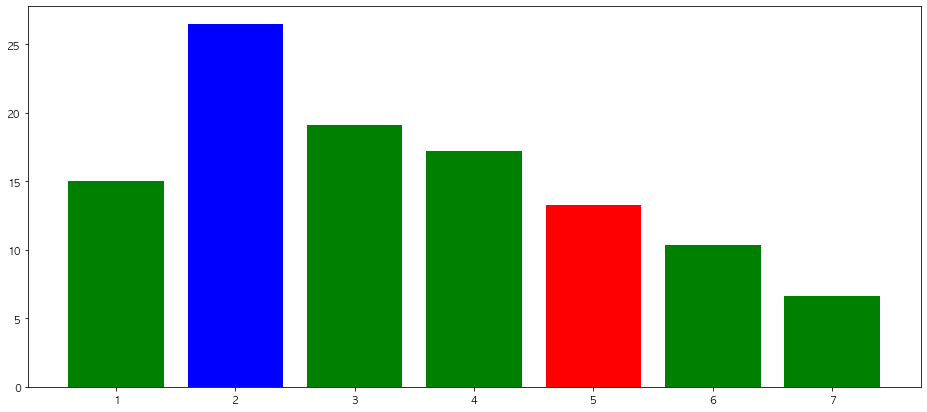

In [477]:
print("해당 가구와 전체 평균 기여도면에서 가장 차이가 많이 나는 요일은 {}요일 입니다.\n".format(DAY_ARR[cont_chk_4.argmax()]))
print("해당 요일의 집계 기여도 평균은 아래와 같습니다.")

cont_day_compare = scc[scc.index.weekday == cont_chk_4.argmax()].mean()
general_day_cont = cont_day_compare.keys()[cont_day_compare.argmax()]
target_day_cont = round(contribution_df[day_cols[cont_chk_4.argmax()]][sh].mean())

plt.figure(figsize=(16,7))

for _ in cont_day_compare.keys():
    plt.bar(_, cont_day_compare[_],color=
            'r' if _ == target_day_cont else 
            'b' if _ == general_day_cont else 'g' )

# 시간적 비교

In [479]:
print("----선택 정보를 확인해주세요.")
print("그룹 명 : {}".format(sg))
print("가구 명 : {}\n".format(sh))

print("요일 비교 (전체 평균도)")
print("\t• 나의 그룹 •")
cont_chk_1 = cc_time_cont[sg].values - acc_time_cont.values.flatten()
cont_chk_2 = cc_time_usage[sg].values - acc_time_usage.values.flatten()
print("기여도",cont_chk_1)
print("사용량",cont_chk_2)
print("기여도면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_1 == cont_chk_1[cont_chk_1.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_2 == cont_chk_2[cont_chk_2.argmax()])[0]]))

print("\n\t• 나 •")
cont_chk_3 = time_cont[sh].values - acc_time_cont.values.flatten()
cont_chk_4 = time_usage[sh].values - acc_time_usage.values.flatten()
print("기여도",cont_chk_3)
print("사용량",cont_chk_4)
print("기여도면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_3 == cont_chk_3[cont_chk_3.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_4 == cont_chk_4[cont_chk_4.argmax()])[0]]))

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-202

요일 비교 (전체 평균도)
	• 나의 그룹 •
기여도 [2. 2. 2. 2. 1. 3. 2. 3.]
사용량 [0.118 0.101 0.191 0.192 0.169 0.175 0.248 0.251]
기여도면 최대차이 : ['15시 ~ 17시' '21시 ~ 23시']
사용량면 최대차이 : ['21시 ~ 23시']

	• 나 •
기여도 [3. 3. 2. 0. 0. 2. 1. 2.]
사용량 [0.202 0.161 0.198 0.072 0.09  0.137 0.152 0.219]
기여도면 최대차이 : ['0시 ~ 2시' '3시 ~ 5시']
사용량면 최대차이 : ['21시 ~ 23시']


# 기여도 분석
- 실수로 표기되는 전기 데이터는 통계적으로 보았을 때, 실수이기 때문에 그 수의 범위가 매우 넓다. 때문에, 어느 차이 까지를 임계점으로 잡을지에 대한 경계가 애매하다.
- 기여도 분석은 이 범위를 좁혀준 개념이라고 보면 된다. 시분할 공간 속에서 계속해서 쌓여진 기여도들의 평균을 통해 최종적인 기여도를 산정해낼 수 있고, 이를 정수로 나타내주게 되면, 사용량면에서 최대차이를 보이는 범위는 물론, 위에서 말했던 소수점의 임계부분을 해결을 위한 값을 제공해줄 수 있다. (기여도면에서의 포함 관계에 집중)

# 기여도와 사용량면의 차이

In [480]:
sg = "기여도 그룹 3"
sh = "아파트1-102-403"

print("----선택 정보를 확인해주세요.")
print("그룹 명 : {}".format(sg))
print("가구 명 : {}\n".format(sh))

print("요일 비교 (전체 평균도)")
print("\t• 나의 그룹 •")
cont_chk_1 = cc_day_cont[sg].values - acc_day_cont.values.flatten()
cont_chk_2 = cc_day_usage[sg].values - acc_day_usage.values.flatten()
print("기여도",cont_chk_1)
print("사용량",cont_chk_2)
print("기여도면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_1 == cont_chk_1[cont_chk_1.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_2 == cont_chk_2[cont_chk_2.argmax()])[0]]))

print("\n\t• 나 •")
cont_chk_3 = day_cont[sh].values - acc_day_cont.values.flatten()
cont_chk_4 = day_usage[sh].values - acc_day_usage.values.flatten()
print("기여도",cont_chk_3)
print("사용량",cont_chk_4)
print("기여도면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_3 == cont_chk_3[cont_chk_3.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_4 == cont_chk_4[cont_chk_4.argmax()])[0]]))

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 3
가구 명 : 아파트1-102-403

요일 비교 (전체 평균도)
	• 나의 그룹 •
기여도 [ 0. -1. -1. -1. -1. -1. -1.]
사용량 [-0.011 -0.022 -0.017 -0.023 -0.007 -0.019 -0.019]
기여도면 최대차이 : ['월']
사용량면 최대차이 : ['금']

	• 나 •
기여도 [0. 1. 0. 0. 0. 0. 0.]
사용량 [0.04  0.061 0.043 0.036 0.046 0.062 0.059]
기여도면 최대차이 : ['화']
사용량면 최대차이 : ['토']


- 기여도 평가는 사용량면의 비교와 다른 차이를 보여줄 수 있다.

기여도면에서 최고 차이
	전체 평균 사용량: 0.252kWh
	나의 평균 사용량: 0.313kWh


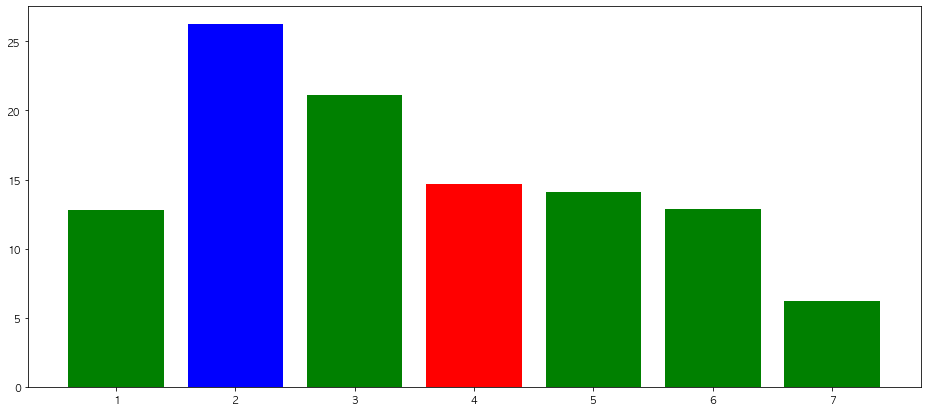

사용량면에서 최고 차이
	전체 평균 사용량: 0.267kWh
	나의 평균 사용량: 0.329kWh


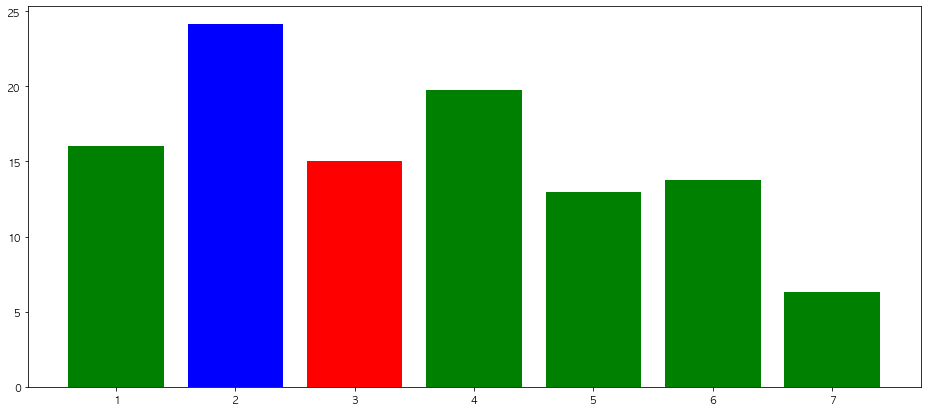

In [481]:
cont_day_compare = scc[scc.index.weekday == cont_chk_3.argmax()].mean()
general_day_cont = cont_day_compare.keys()[cont_chk_3.argmax()]
target_day_cont = round(contribution_df[day_cols[cont_chk_3.argmax()]][sh].mean())

print("기여도면에서 최고 차이")
print("\t전체 평균 사용량: {}kWh".format(acc_day_usage.iloc[cont_chk_3.argmax()].values[0]))
print("\t나의 평균 사용량: {}kWh".format(day_usage[sh].iloc[cont_chk_3.argmax()]))
plt.figure(figsize=(16,7))

for _ in cont_day_compare.keys():
    plt.bar(_, cont_day_compare[_],color=
            'r' if _ == target_day_cont else 
            'b' if _ == general_day_cont else 'g' )
    
plt.show()
    
cont_day_compare = scc[scc.index.weekday == cont_chk_4.argmax()].mean()
general_day_cont = cont_day_compare.keys()[cont_day_compare.argmax()]
target_day_cont = round(contribution_df[day_cols[cont_chk_4.argmax()]][sh].mean())

print("사용량면에서 최고 차이")
print("\t전체 평균 사용량: {}kWh".format(acc_day_usage.iloc[cont_chk_4.argmax()].values[0]))
print("\t나의 평균 사용량: {}kWh".format(day_usage[sh].iloc[cont_chk_4.argmax()]))
plt.figure(figsize=(16,7))

for _ in cont_day_compare.keys():
    plt.bar(_, cont_day_compare[_],color=
            'r' if _ == target_day_cont else 
            'b' if _ == general_day_cont else 'g' )
    
plt.show()

- 기여도는 특정 시간대에 많이 사용하여, 혹은 특정 시간대에 다른 사용자들보다 평균적으로 많이 사용해서 쌓아진 결과이다. 즉, 행동패턴에 기반이 되기 때문에 사용량면에서의 비교와는 차이가 발생할 수 있다. 이는 분산의 차이의 관점으로 볼 수가 있다.

기여도면에서 최고 차이인 화요일
	표준편차: 0.08157779750000001


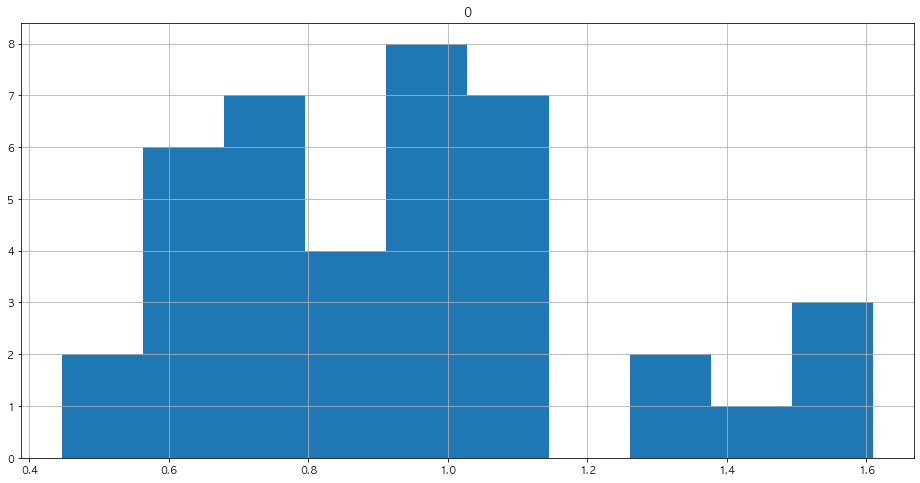


사용량면에서 최고 차이인 토요일
	표준편차: 0.09002960937499999


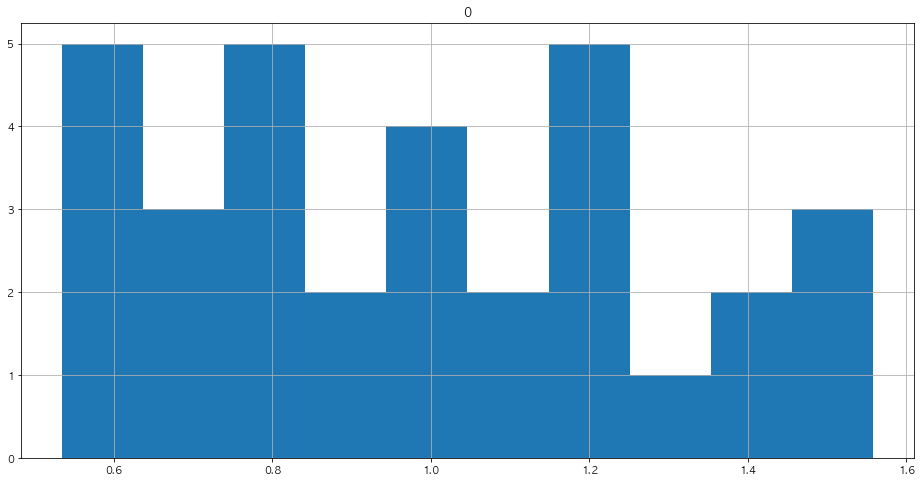

In [472]:
print("기여도면에서 최고 차이인 {}요일".format(DAY_ARR[cont_chk_3.argmax()]))
print("\t표준편차: {}".format(df[sh][all_day_cols[cont_chk_3.argmax()]].values.reshape(-1, size).sum(axis=1).var()))
pd.DataFrame(df[sh][all_day_cols[cont_chk_3.argmax()]].values.reshape(-1, size).sum(axis=1))\
    .hist(figsize=(16,8), bins=10)
plt.show()

print("\n사용량면에서 최고 차이인 {}요일".format(DAY_ARR[cont_chk_4.argmax()]))
print("\t표준편차: {}".format(df[sh][all_day_cols[cont_chk_4.argmax()]].values.reshape(-1, size).sum(axis=1).var()))
pd.DataFrame(df[sh][all_day_cols[cont_chk_4.argmax()]].values.reshape(-1, size).sum(axis=1))\
    .hist(figsize=(16,8), bins=10)
plt.show()

- 해당 가구는 기여도면에서 최고 차이를 보인 화요일이라는 시간에는 본인의 평균 값에 분포 하여 에너지를 소비하였다. 즉, 꾸준히 평균값 만큼 사용한 것이다.
- 사용량면에서 최고 차이를 보인 토요일이라는 시간에는 여러 에너지 사용을 기록했다. 많이 사용한 날도 있는 반면, 적게 사용한 날도 있었다. 즉, 사용량이 일정치 않았다는 것이다. 그렇기에 기여도가 낮게 산정된 시간대가 존재하여, 기여도 산정에서 기여도가 낮게 산정되는 경우가 존재했으며, 이는 최종 기여도 산정에 영향을 미쳤기 때문에 기여도면에서는 해당 날을 잡아내지 못한 것 이다.
- 반대로 기여도는 폭 넓은 임계치를 지원해줄 수 있다는 점을 말했었다. 즉, 기여도로 뽑혀진 값과 사용량으로 뽑혀진 값을 조합하면, 폭 넓은 피드백이 가능해진다는 것 이다. (사용량을 초점을 맞추되, 그외 부가적인 것으로 기여도 분석을 이용)

# 나의 그룹에서의 위치

- 패턴을 클러스터링 하게 되면, 클러스터링 패턴을 기준으로 아래에 존재하는 패턴이 있고, 위에 존재하는 패턴이 있다.

In [520]:
def sel_pos(value):
    if value >= 1:
        return "high"
    elif value == 0:
        return "eq"
    else:
        return "low"

## 요일적 분석

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-1502

가구 아파트1-103-1502는 기여도 그룹 5의 ['월' '화' '수' '목' '금' '토' '일']요일에 속해 있습니다.
그 중 ['화' '목' '금']요일은 많은 사용량을 보이고 있습니다.


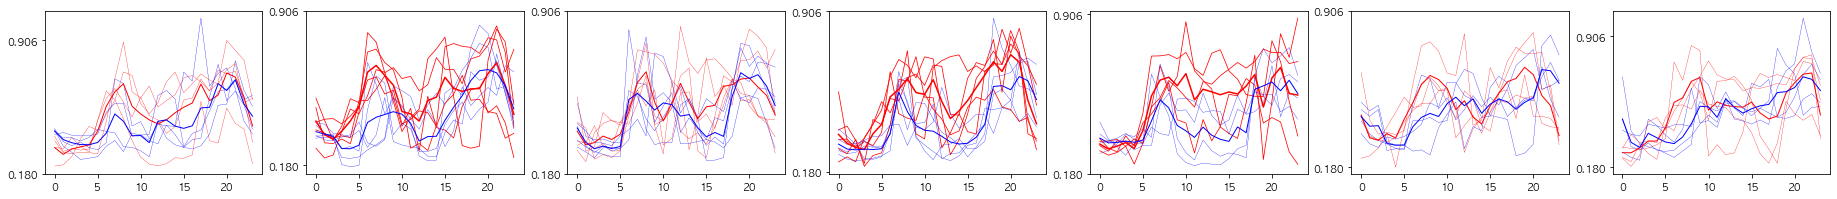

In [635]:
sg, sh = consoling()

# 요일별
err_day_cont = (day_cont[sh] - cc_day_cont[sg]).map(lambda x: sel_pos(x))
err_day_usage = day_usage[sh] - cc_day_usage[sg]

composite_day = err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values

print("가구 {}는 {}의 {}요일에 속해 있습니다.".
     format(sh,sg,err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values))
if len(err_day_cont[err_day_cont == "high"].keys().values) != 0:
    print("그 중 {}요일은 많은 사용량을 보이고 있습니다.".
         format(err_day_cont[err_day_cont == "high"].keys().values))

fig, ax = plt.subplots(1,len(DAY_ARR), figsize=(32, 3))

for weekday,day in enumerate(DAY_ARR):
    day_idx = df.index.weekday == weekday
    
    _c_pattern = cc_pattern[day_idx][sg].values.reshape(-1, 24)
    _h_pattern = df[day_idx][sh].values.reshape(-1, 24)
    
    is_composite = DAY_ARR[weekday] in composite_day
    is_high = err_day_cont[DAY_ARR[weekday]] == "high"
    for pat_idx, h_pat in enumerate(_h_pattern):
        c_pat = _c_pattern[pat_idx]
        ax[weekday].plot(h_pat, color='r' if is_composite else 'g', linewidth=0.75 if is_high else 0.3)
        ax[weekday].plot(c_pat, color='b', linewidth=0.3)
        
    ax[weekday].plot(_h_pattern.mean(axis=0), color='r' if is_composite else 'g', linewidth=1.5 if is_high else 1)
    ax[weekday].plot(_c_pattern.mean(axis=0), color='b', linewidth=1)
    ax[weekday].set_yticks([df[sh].min(), df[sh].max()])

## 시간적 분석

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 2
가구 명 : 아파트1-104-1206

가구 아파트1-104-1206는 기여도 그룹 2의 ['0시 ~ 2시' '3시 ~ 5시' '6시 ~ 8시' '9시 ~ 11시' '12시 ~ 14시' '15시 ~ 17시'
 '18시 ~ 20시' '21시 ~ 23시']시간대에 속해 있습니다.
그 중 ['0시 ~ 2시' '3시 ~ 5시' '21시 ~ 23시']시간대는 많은 사용량을 보이고 있습니다.


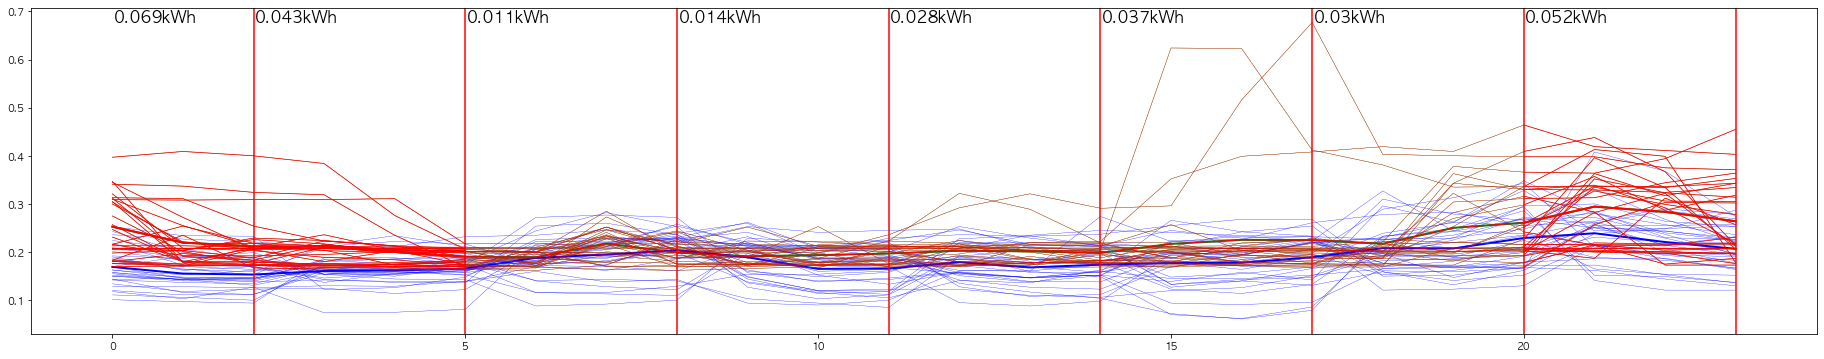

In [655]:
sg, sh = consoling()

# 요일별
err_time_cont = (time_cont[sh] - cc_time_cont[sg]).map(lambda x: sel_pos(x))
err_time_usage = time_usage[sh] - cc_time_usage[sg]

composite_time = err_time_cont[(err_time_cont == "eq") | (err_time_cont == "high")].keys().values

print("가구 {}는 {}의 {}시간대에 속해 있습니다.".
     format(sh,sg,err_time_cont[(err_time_cont == "eq") | (err_time_cont == "high")].keys().values))
if len(err_time_cont[err_time_cont == "high"].keys().values) != 0:
    print("그 중 {}시간대는 많은 사용량을 보이고 있습니다.".
         format(err_time_cont[err_time_cont == "high"].keys().values))
    
_c_pattern = cc_pattern[sg].values.reshape(-1,24)
_h_pattern = df[sh].values.reshape(-1, 24)

plt.figure(figsize=(32,6))
for pat_idx, h_pat in enumerate(_h_pattern):
    c_pat = _c_pattern[pat_idx]
    plt.plot(h_pat, color='g', linewidth=0.3)
    plt.plot(c_pat, color='b', linewidth=0.3)
    
plt.plot(_h_pattern.mean(axis=0), color='g', linewidth=2)
plt.plot(_c_pattern.mean(axis=0), color='b', linewidth=2)

max_kwh = _h_pattern.max() if _h_pattern.max() > _c_pattern.max() else _c_pattern.max()

for idx,time in enumerate(range(2, 24, 3)):
    time_kor = TIME_KOR_STR[idx]
    is_composite = time_kor in composite_time
    is_high = err_time_cont[time_kor] == "high"
    
    plt.axvline(time, color='r' if is_composite else 'b')
    

    start_time = time - 3
    start_time = 0 if start_time < 0 else start_time

    end_time = time + 1

    _time_h_pattern = _h_pattern[:, start_time: end_time]
    _time_c_pattern = _c_pattern[:, start_time: end_time]
    
    plt.text(start_time + 0.02, max_kwh, "{}kWh".format(
                round((_time_h_pattern.mean() - _time_c_pattern.mean()) * 1000) / 1000),
            fontsize=16)
    if is_composite:
        for pat_idx, h_pat in enumerate(_time_h_pattern):
            plt.plot(range(start_time, end_time), h_pat, color='r', linewidth=0.75 if is_high else 0.3)

        plt.plot(range(start_time, end_time), _time_h_pattern.mean(axis=0), color='r', linewidth=2 if is_high else 1)

# 이전 기여도 그룹과의 비교

## 요일적 분석

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-102-501

가구 아파트1-102-501의 이전 기여도 그룹 4의 ['월' '화' '수' '목' '금' '토' '일']요일에 속해 있습니다.
그 중 ['월' '화' '수' '목' '토' '일']요일은 많은 사용량을 보이고 있습니다.


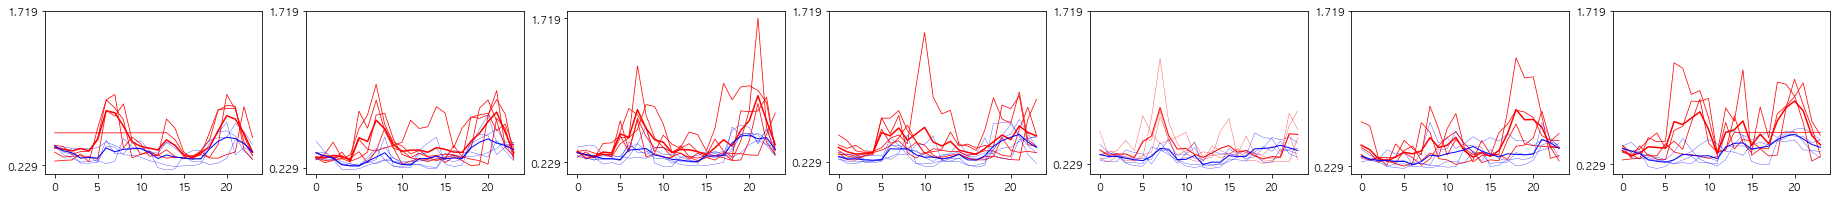

In [670]:
sg, sh = consoling()
sg = cc_cols[int(cont_mean_df.loc[sh]['contribution']) - 2]

# 요일별
err_day_cont = (day_cont[sh] - cc_day_cont[sg]).map(lambda x: sel_pos(x))
err_day_usage = day_usage[sh] - cc_day_usage[sg]

composite_day = err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values

print("가구 {}의 이전 {}의 {}요일에 속해 있습니다.".
     format(sh,sg,err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values))
if len(err_day_cont[err_day_cont == "high"].keys().values) != 0:
    print("그 중 {}요일은 많은 사용량을 보이고 있습니다.".
         format(err_day_cont[err_day_cont == "high"].keys().values))

fig, ax = plt.subplots(1,len(DAY_ARR), figsize=(32, 3))

for weekday,day in enumerate(DAY_ARR):
    day_idx = df.index.weekday == weekday
    
    _c_pattern = cc_pattern[day_idx][sg].values.reshape(-1, 24)
    _h_pattern = df[day_idx][sh].values.reshape(-1, 24)
    
    is_composite = DAY_ARR[weekday] in composite_day
    is_high = err_day_cont[DAY_ARR[weekday]] == "high"
    for pat_idx, h_pat in enumerate(_h_pattern):
        c_pat = _c_pattern[pat_idx]
        ax[weekday].plot(h_pat, color='r' if is_composite else 'g', linewidth=0.75 if is_high else 0.3)
        ax[weekday].plot(c_pat, color='b', linewidth=0.3)
        
    ax[weekday].plot(_h_pattern.mean(axis=0), color='r' if is_composite else 'g', linewidth=1.5 if is_high else 1)
    ax[weekday].plot(_c_pattern.mean(axis=0), color='b', linewidth=1)
    ax[weekday].set_yticks([df[sh].min(), df[sh].max()])

In [666]:
cc_cols

Index(['기여도 그룹 1', '기여도 그룹 2', '기여도 그룹 3', '기여도 그룹 4', '기여도 그룹 5', '기여도 그룹 6'], dtype='object')